In [1]:
import os
from pathlib import Path

# 取得當前工作目錄
current = Path(os.getcwd())

# 檢查當前目錄的父目錄名稱並執行相應操作
if current.name == 'Notebooks':
    print(f"Current Path: {current}")
elif current.name == 'test_notebooks' or current.name == 'AOI':
    # 切換到上層目錄
    os.chdir('../')
    # 更新 current 變量為新的工作目錄
    current = Path(os.getcwd())
    print(f"Updated Path: {current}")
else:
    print("No matching parent directory found.")
    
import cv2  # 用於讀取圖片
import numpy as np  # 用於數學運算
import matplotlib.pyplot as plt  # 用於圖形顯示
import pathlib

from mymodules.filter.basic_filters import get_lines_hough, equalized_image, image_binary, crop

Updated Path: /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Notebooks


In [2]:
import datetime
now = datetime.datetime.now()
f"{now.date()}"

folder_path = pathlib.Path(r"/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/outputs/pdf")
folder_path = folder_path / f"{now.date()}"
folder_path.mkdir(parents=True, exist_ok=True) # 確保目錄存在，不存在則創建
folder_path.as_posix()

template_folder_path = folder_path / 'template'
template_folder_path.mkdir(parents=True, exist_ok=True)

import os
origin_image_folder = pathlib.Path(r"/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/Data/Setup_2/Test_5_1")
origin_images = os.listdir(origin_image_folder.as_posix())
origin_images = [image for image in sorted(origin_images) if image[-4:]==".tif"]
origin_images

['5_1.tif',
 '5_2.tif',
 'F10.tif',
 'F11.tif',
 'F12.tif',
 'F24.tif',
 'F36.tif',
 'F37.tif',
 'F9.tif']

Image changed to Blue channel


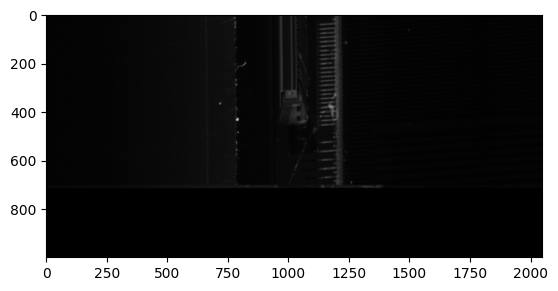

In [3]:
image_number = 0
origin_image_path = origin_image_folder / origin_images[image_number]
origin_name = origin_image_path.name

from mymodules.image_manager import ImageManager

origin_im = ImageManager(origin_image_path.as_posix())
origin_im.choose_rgb('b')

origin_im.show()

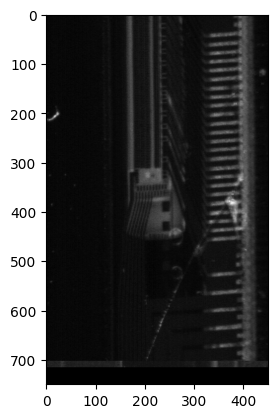

Name: crop.tif
Folder: /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/Data/Setup_2/Test_5_1
Type:  <class 'numpy.ndarray'>
Shape:  (750, 450)
Max:  84
Min:  0
Mean:  7.386817777777778
Standard Deviation:  7.549556092379222


In [4]:
origin_im = origin_im.process(crop, params={'x1':800,'x2': 1250, 'y1':0, 'y2':750}) # 9
origin_im.show()
origin_im.basic_array_info()

In [5]:
from mymodules.filter import morphology, en

Image changed to Red channel


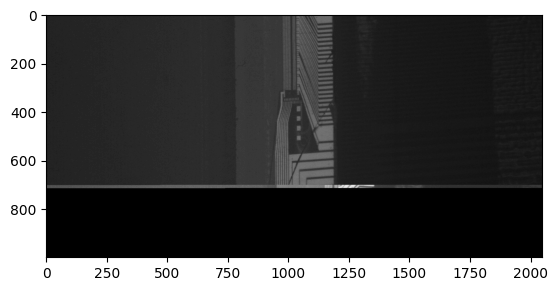

In [6]:
r_origin_im = ImageManager(origin_image_path.as_posix())
r_origin_im.choose_rgb('r')
r_origin_im.show()

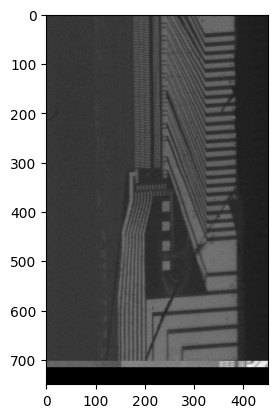

Name: crop.tif
Folder: /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/Data/Setup_2/Test_5_1
Type:  <class 'numpy.ndarray'>
Shape:  (750, 450)
Max:  54
Min:  0
Mean:  13.116722962962964
Standard Deviation:  5.821894261059211


In [7]:
r_origin_im = r_origin_im.process(crop, params={'x1':800,'x2': 1250, 'y1':0, 'y2':750}) # 9
r_origin_im.show()
r_origin_im.basic_array_info()

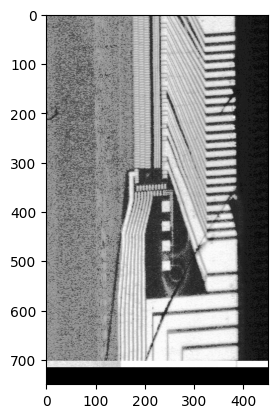

In [8]:
er_im = r_origin_im.process(equalized_image)
er_im.show()

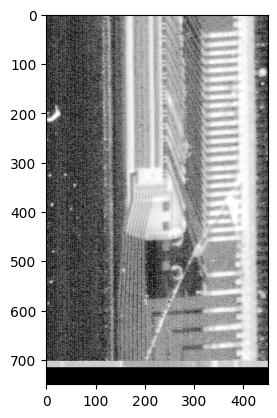

In [10]:
e_im = origin_im.process(equalized_image)
e_im.show()

In [13]:
r_origin_im.image.mean()/origin_im.image.mean()

np.float64(1.7756933171443345)

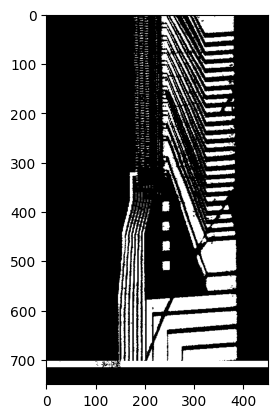

In [58]:
b_r_im = r_origin_im.process(image_binary, params={'standard':1})
b_r_im.show()

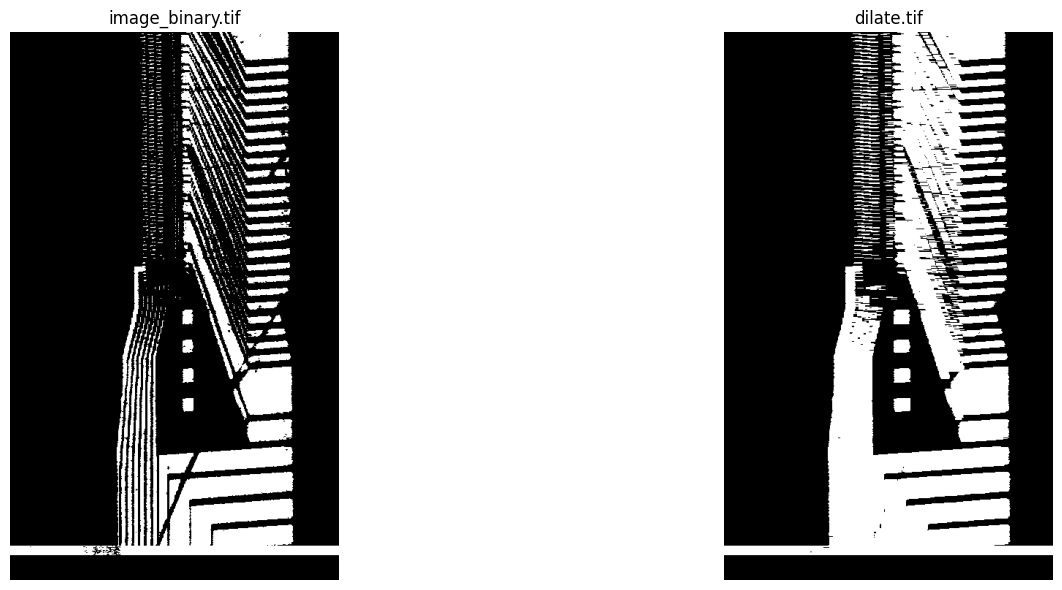

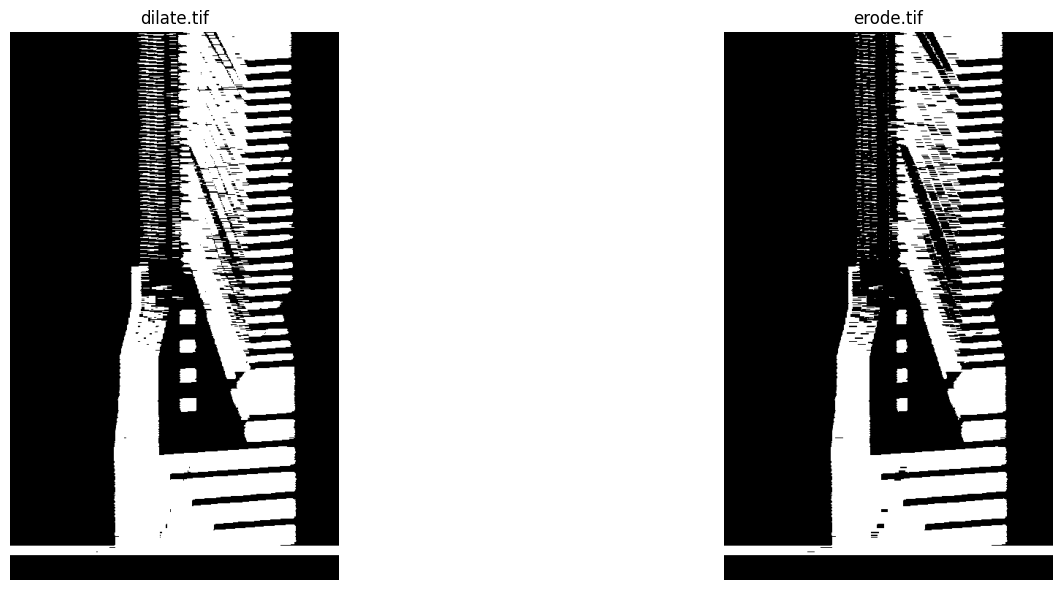

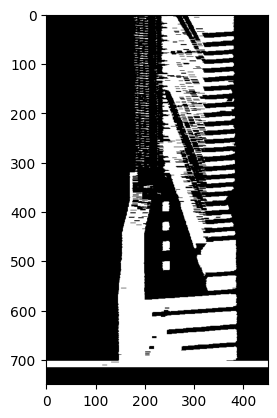

In [86]:
kernel = np.array([
    [1 for _ in range(5)]
], dtype=np.uint8)

# processed_im = b_r_im.process(morphology.dilate, params={'kernel':kernel, 'iterations':2}, compare=True)
# processed_im = processed_im.process(morphology.erode, params={'kernel':kernel, 'iterations':2}, compare=True)
# processed_im = er_im.process(morphology.close, params={'kernel':kernel})
# processed_im = processed_im
processed_im.show()

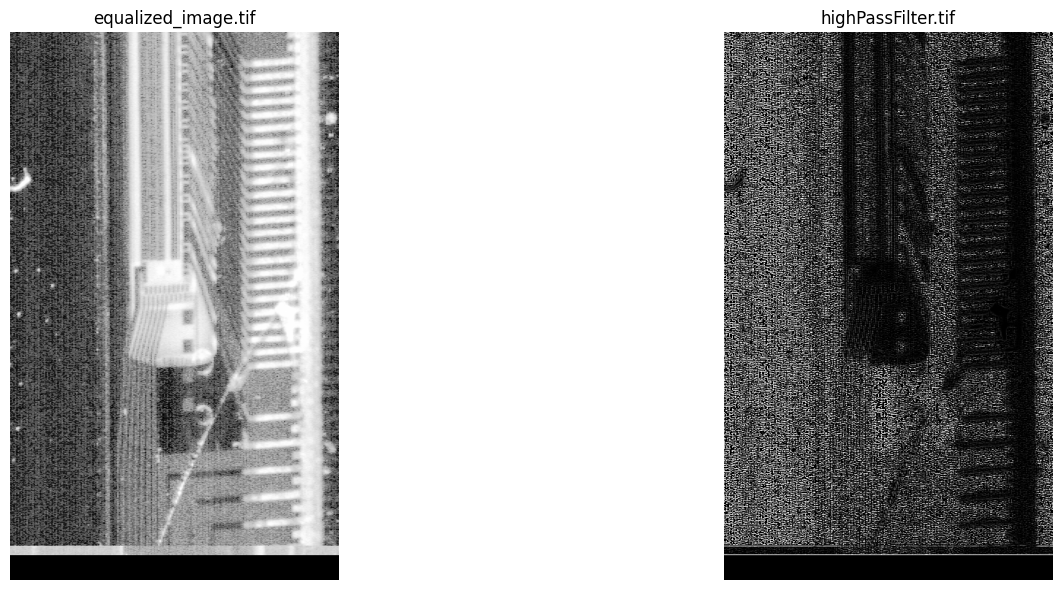

np.float64(126.23198222222223)

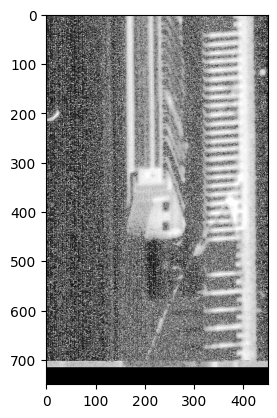

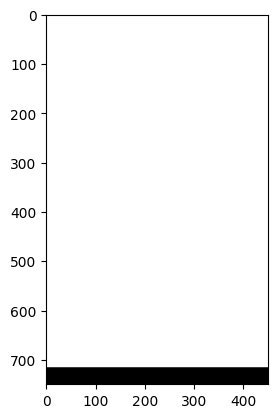

In [105]:
from mymodules.filter import morphology, enhance, edge

kernel = np.array([
    [1 for _ in range(5)]
], dtype=np.uint8)

e_im = origin_im.process(equalized_image)

# b_im = e_im.process(image_binary, compare=True, params={'threshold_value':200})
hp_im = e_im.process(enhance.highPassFilter, compare=True)

image = e_im.image - hp_im.image   
plt.imshow(image, cmap='gray')

processed_image = morphology.remove_small_objects(image, min_size=1)
plt.figure()
plt.imshow(processed_image, cmap='gray')

In [78]:
image = r_origin_im.image- origin_im.image

process_image = image_binary(image)

image.max(), image.mean()

(np.uint8(255), np.float64(49.73080592592593))

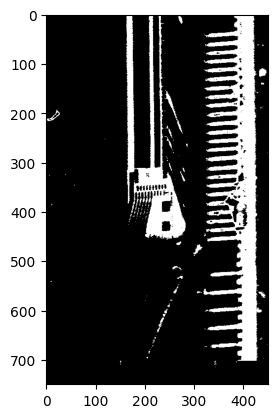

In [80]:
plt.imshow(process_image, cmap='gray')

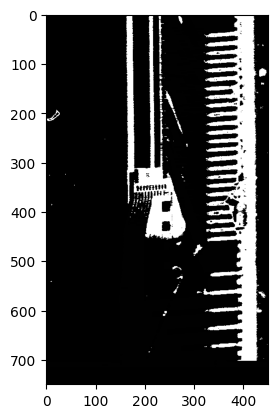

In [79]:
plt.imshow(process_image-processed_im.image, cmap='gray')

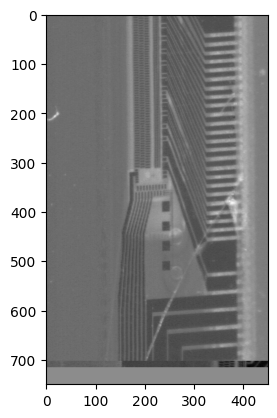

In [23]:
plt.imshow(r_origin_im.image*(r_origin_im.image.mean()/origin_im.image.mean()) - origin_im.image, cmap='gray')

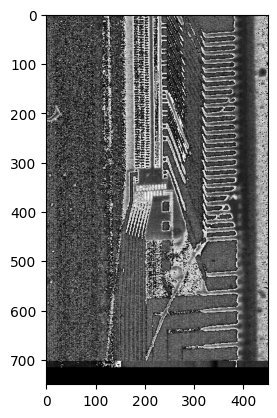

In [17]:
plt.imshow(er_im.image - e_im.image, cmap='gray')